In [11]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from src.load import load_financial_transfer_networks, financial_transfer_network_from_df, load_basic_transfer_networks
from src.util import FinancialTransferNetwork

from collections import defaultdict


In [25]:
tn = load_basic_transfer_networks()[2019]

In [29]:
g = nx.DiGraph()

for u, v in tn.G.edges():
    if u not in tn.league_clubs:
        u = 'not PL club'
    if v not in tn.league_clubs:
        v = 'not PL club'
        
    g.add_edge(u, v)
    
for u, v in tn.G.edges():
    if u in tn.league_clubs and v in tn.league_clubs:
        print('ope')

In [27]:
in_degs = defaultdict(lambda: 1)
for u, v in g.edges():
    in_degs[v] += 1
    
sizes = []
for node in g.nodes():
    sizes.append(100 * in_degs[node])

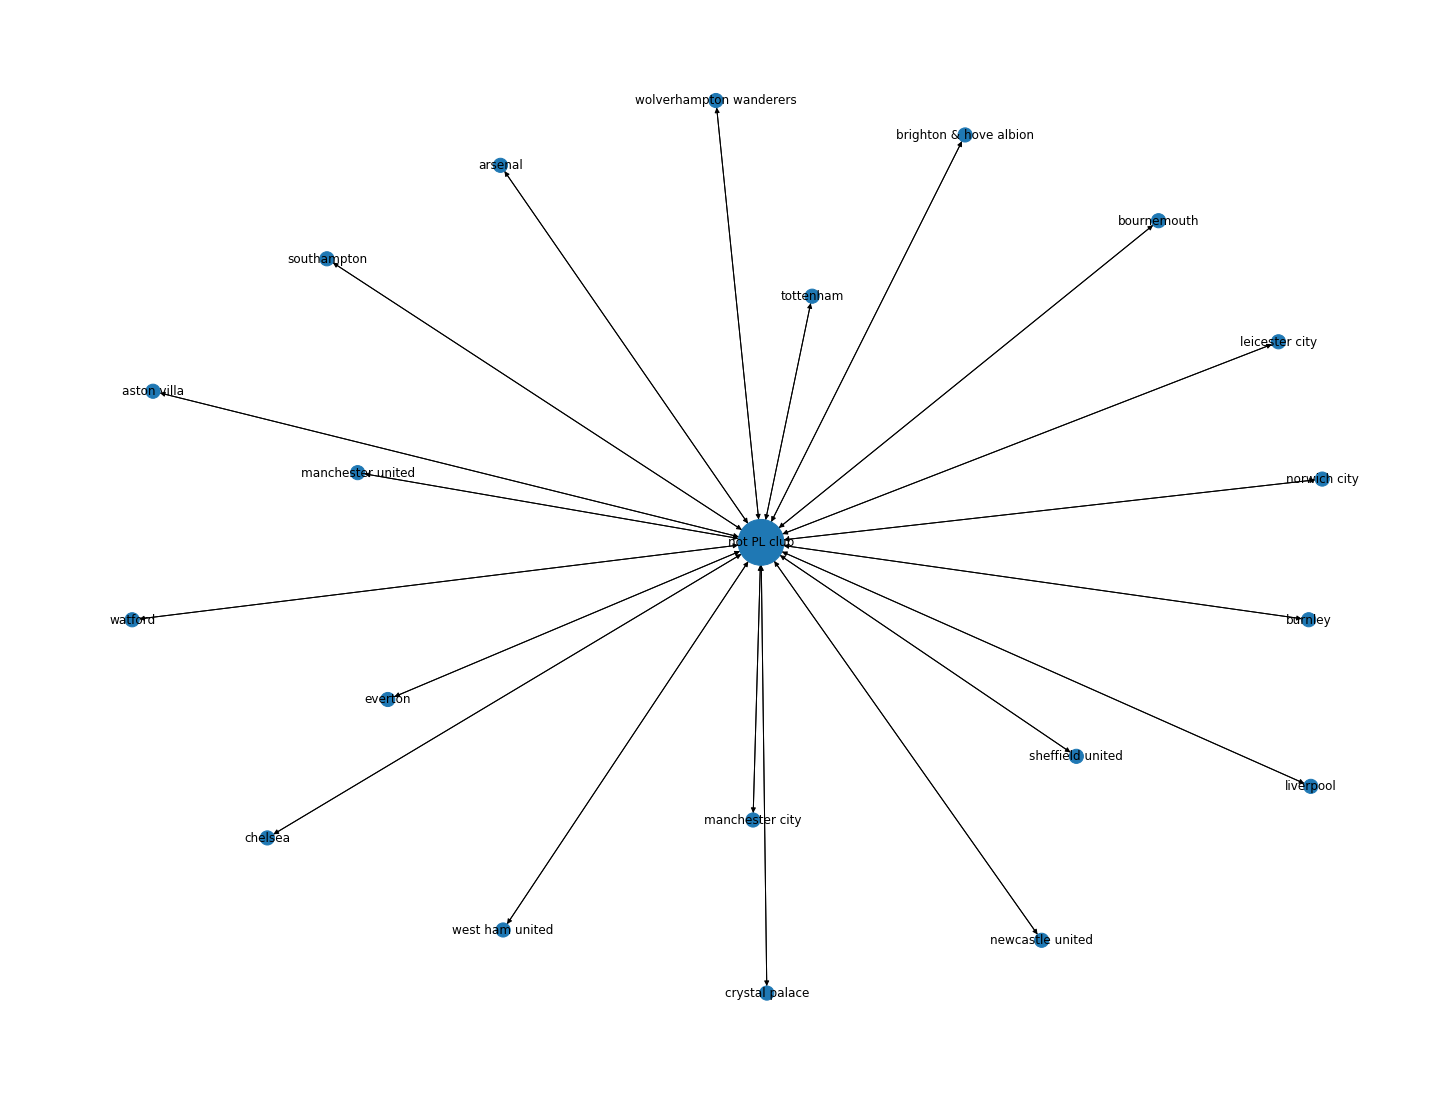

In [28]:
plt.figure(figsize=(20, 15))

pos = nx.spring_layout(g)
d = nx.degree(g)
nx.draw(g, with_labels=True, node_size=sizes)